# Perceptron

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import pickle

In [0]:
def f(x):
    return 1 / (1 + np.exp(-x))
    
def f_deriv(x):
    return f(x) * (1 - f(x))

In [0]:
def setup_and_init_weights(nn_structure):
    W = {}
    b = {}
    for l in range(1, len(nn_structure)):
        W[l] = r.random_sample((nn_structure[l], nn_structure[l-1]))
        b[l] = r.random_sample((nn_structure[l],))
    return W, b

In [0]:
def init_tri_values(nn_structure):
    tri_W = {}
    tri_b = {}
    for l in range(1, len(nn_structure)):
        tri_W[l] = np.zeros((nn_structure[l], nn_structure[l-1]))
        tri_b[l] = np.zeros((nn_structure[l],))
    return tri_W, tri_b

In [0]:
def feed_forward(x, W, b):
    h = {1: x}
    z = {}
    for l in range(1, len(W) + 1):
        # if its the first layer, then the input into the weights is x, otherwise,
        # it is the output from the last layer
        if l == 1:
            node_in = x
        else:
            node_in = h[l]
        z[l+1] = W[l].dot(node_in) + b[l] # z^(l+1) = W^(l)*h^(l) + b^(l)
        h[l+1] = f(z[l+1]) # h^(l) = f(z^(l))
    return h, z

In [0]:
def calculate_out_layer_delta(y, h_out, z_out):
    # delta^(nl) = -(y_i - h_i^(nl)) * f'(z_i^(nl))
    return -(y-h_out) * f_deriv(z_out)


def calculate_hidden_delta(delta_plus_1, w_l, z_l):
    # delta^(l) = (transpose(W^(l)) * delta^(l+1)) * f'(z^(l))
    return np.dot(np.transpose(w_l), delta_plus_1) * f_deriv(z_l)

In [0]:
def train_nn(nn_structure, X, y, iter_num=3000, alpha=0.25):
    W, b = setup_and_init_weights(nn_structure)
    cnt = 0
    m = len(y)
    avg_cost_func = []
    print('Starting gradient descent for {} iterations'.format(iter_num))
    while cnt < iter_num:
        if cnt%100 == 0:
            print('Iteration {} of {}'.format(cnt, iter_num))
        tri_W, tri_b = init_tri_values(nn_structure)
        avg_cost = 0
        for i in range(len(y)):
            delta = {}
            # perform the feed forward pass and return the stored h and z values | выполнить проход прямого распостранения и вернуть сохраненные значения h и z
            # to be used in the gradient descent step | которые будут использоваться на этапе градиентного спуска
            h, z = feed_forward(X[i, :], W, b)
            # loop from nl-1 to 1 backpropagating the errors | цикл от nl(длина сети) до 1, обратное распостранение ошибки
            for l in range(len(nn_structure), 0, -1): # [3, 2, 1]
                if l == len(nn_structure): # если ето виходной слой, то
                    delta[l] = calculate_out_layer_delta(y[i], h[l], z[l]) # оценочная функция для выходного слоя
                    avg_cost += np.linalg.norm((y[i]-h[l])) # norm of the matrix
                else: 
                    if l > 1: # если скрый слой
                        delta[l] = calculate_hidden_delta(delta[l+1], W[l], z[l]) # оценочная функция для скрытого слоя
                    # triW^(l) = triW^(l) + delta^(l+1) * transpose(h^(l))
                    tri_W[l] += np.dot(delta[l+1][:,np.newaxis], np.transpose(h[l][:,np.newaxis])) # сумма частных производных функции оценки каждого экземпляра
                    # trib^(l) = trib^(l) + delta^(l+1)
                    tri_b[l] += delta[l+1]
        # perform the gradient descent step for the weights in each layer
        for l in range(len(nn_structure) - 1, 0, -1): # процесс градиентного спуска
            W[l] += -alpha * (1.0/m * tri_W[l])
            b[l] += -alpha * (1.0/m * tri_b[l])
        # complete the average cost calculation
        avg_cost = 1.0/m * avg_cost
        avg_cost_func.append(avg_cost)
        cnt += 1
    return W, b, avg_cost_func

In [0]:
def predict_y(W, b, X, n_layers):
    m = X.shape[0]
    y = np.zeros((m,))
    for i in range(m):
        h, z = feed_forward(X[i, :], W, b)
        y[i] = np.argmax(h[n_layers])
    return y

In [0]:
pickle_in = open("/content/tcpALLCombineSUNDAY_END_0.pickle", "rb")
transw = pickle.load(pickle_in)

In [0]:
import statistics

X = np.array(transw[0])
pickle_out = open("/content/fit_transform_prmtrs.pickle", "wb")  
pickle.dump([[statistics.mean(X[:,0].tolist()), statistics.pstdev(X[:,0].tolist()), min(X[:,0].tolist()), max(X[:,0].tolist())],
             [statistics.mean(X[:,1].tolist()), statistics.pstdev(X[:,1].tolist()), min(X[:,1].tolist()), max(X[:,1].tolist())],
             [statistics.mean(X[:,2].tolist()), statistics.pstdev(X[:,2].tolist()), min(X[:,2].tolist()), max(X[:,2].tolist())],
             [statistics.mean(X[:,3].tolist()), statistics.pstdev(X[:,3].tolist()), min(X[:,3].tolist()), max(X[:,3].tolist())],
             [statistics.mean(X[:,4].tolist()), statistics.pstdev(X[:,4].tolist()), min(X[:,4].tolist()), max(X[:,4].tolist())],
             [statistics.mean(X[:,5].tolist()), statistics.pstdev(X[:,5].tolist()), min(X[:,5].tolist()), max(X[:,5].tolist())],
             [statistics.mean(X[:,6].tolist()), statistics.pstdev(X[:,6].tolist()), min(X[:,6].tolist()), max(X[:,6].tolist())],
             [statistics.mean(X[:,7].tolist()), statistics.pstdev(X[:,7].tolist()), min(X[:,7].tolist()), max(X[:,7].tolist())]], 
            pickle_out)
pickle_out.close()

In [0]:
X_scale = StandardScaler()
X = X_scale.fit_transform(np.array(transw[0])) # поместить в первую часть масива обучающие данные [[T, L, averV, firstV, firstL, maxV, clickT, nDev], ...]
y = np.array(transw[1]) # а во вторую ответы [1, 0, 1, ...]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train, X_test, y_train, y_test

(array([[ 0.80154186,  2.04528583,  1.59744239, ...,  0.03520366,
          0.14350302, -0.32752605],
        [-0.3760782 , -0.38339578, -0.1872603 , ..., -0.09934011,
          0.28288447, -0.74547446],
        [-0.525198  , -0.65799814, -0.49496253, ..., -0.09873718,
          0.39212262,  1.3049179 ],
        ...,
        [-1.25504639, -1.27239117, -1.09051205, ..., -0.18857025,
         -0.32840181, -0.76494168],
        [ 0.82091783, -0.25434863, -0.79035534, ..., -0.00589662,
          0.25061492, -0.58595337],
        [-0.56614342, -1.30363965, -1.55071299, ..., -0.19007104,
          0.61321158, -0.73428023]]),
 array([[-0.16032223, -1.28892086, -1.65893393, ..., -0.17208744,
         -0.28611643, -0.81688599],
        [-0.780803  , -1.01389658, -0.91676903, ..., -0.19647609,
         -0.00686711, -0.28988255],
        [ 0.91906909,  0.2507278 , -0.32714135, ...,  0.36129616,
          1.10251697, -0.1282333 ],
        ...,
        [-0.86546073, -0.51136961,  0.13540455, ..., -

Starting gradient descent for 3000 iterations
Iteration 0 of 3000
Iteration 100 of 3000
Iteration 200 of 3000
Iteration 300 of 3000
Iteration 400 of 3000
Iteration 500 of 3000
Iteration 600 of 3000
Iteration 700 of 3000
Iteration 800 of 3000
Iteration 900 of 3000
Iteration 1000 of 3000
Iteration 1100 of 3000
Iteration 1200 of 3000
Iteration 1300 of 3000
Iteration 1400 of 3000
Iteration 1500 of 3000
Iteration 1600 of 3000
Iteration 1700 of 3000
Iteration 1800 of 3000
Iteration 1900 of 3000
Iteration 2000 of 3000
Iteration 2100 of 3000
Iteration 2200 of 3000
Iteration 2300 of 3000
Iteration 2400 of 3000
Iteration 2500 of 3000
Iteration 2600 of 3000
Iteration 2700 of 3000
Iteration 2800 of 3000
Iteration 2900 of 3000


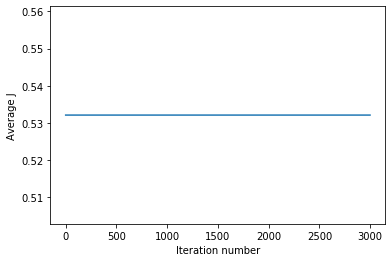

Prediction accuracy is 53.21100917431193%


In [0]:
# setup the NN structure
nn_structure = [8, 128, 128, 1]
# train the NN
W, b, avg_cost_func = train_nn(nn_structure, X_train, y_train)
# plot the avg_cost_func
plt.plot(avg_cost_func)
plt.ylabel('Average J')
plt.xlabel('Iteration number')
plt.show()
# get the prediction accuracy and print
y_pred = predict_y(W, b, X_test, 4)
print('Prediction accuracy is {}%'.format(accuracy_score(y_test, y_pred) * 100))

In [0]:
pickle_out = open("/content/NeuralNetworkWeight.pickle", "wb")  
pickle.dump([W, b], pickle_out)
pickle_out.close()

In [0]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=750)
mlp.fit(X_train,y_train)

predict_test = mlp.predict(X_test)
print('NNA %s' % accuracy_score(y_test, predict_test))

NNA 0.8501529051987767


In [0]:
predict_test.sum()/len(predict_test)

0.5229357798165137

In [0]:
pickle_out = open("/content/NeuralNetworAutoWeight.pickle", "wb")  
pickle.dump(mlp, pickle_out)
pickle_out.close()

# Logistic Regression

In [0]:
# import
from sklearn.linear_model import LogisticRegression

# instantiate
logreg = LogisticRegression()

# fit
logreg.fit(X_train, y_train)

# predict
y_pred = logreg.predict(X_test)

print('LogReg %s' % accuracy_score(y_test, y_pred))

LogReg 0.8103975535168195


In [0]:
pickle_out = open("/content/LogisticRegressionWeight.pickle", "wb")  
pickle.dump(logreg, pickle_out)
pickle_out.close()

# K Neighbors Classifier


In [0]:
from sklearn.neighbors import KNeighborsClassifier
k_range = np.arange(1, 32)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
score = scores.index(max(scores)) + 1
print(scores.index(max(scores)), max(scores))
knn = KNeighborsClassifier(n_neighbors=score)
knn.fit(X_train, y_train)

8 0.8776758409785933


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

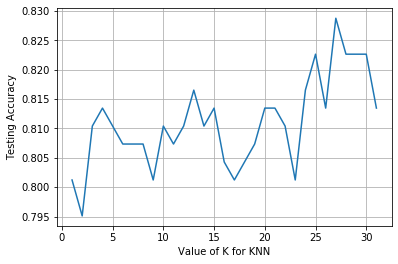

In [0]:
# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [0]:
pickle_out = open("/content/KNeighborsWeight.pickle", "wb")  
pickle.dump(knn, pickle_out)
pickle_out.close()

# Decision Tree Classifier

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Decision Tree Classifier %s' % accuracy_score(y_test, y_pred))

Decision Tree Classifier 0.8134556574923547


In [0]:
pickle_out = open("/content/DecisionTreeWeight.pickle", "wb")  
pickle.dump(clf, pickle_out)
pickle_out.close()

# Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier().fit(X_train, y_train)
print('RFC %s' % rfc.score(X_test, y_test))

RFC 0.8593272171253823


In [0]:
pickle_out = open("/content/RandomForestWeight.pickle", "wb")  
pickle.dump(rfc, pickle_out)
pickle_out.close()

# Extra Trees Classifier

ETC 0.8654434250764526


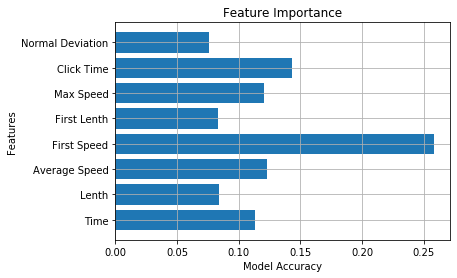

In [0]:
from sklearn.ensemble import ExtraTreesClassifier
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier().fit(X_train, y_train)
print('ETC %s' % extree.score(X_test, y_test))

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(8) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features") 
plt.yticks(pos, ('Time', 'Lenth', 'Average Speed', 'First Speed', 'First Lenth', 'Max Speed', 'Click Time', 'Normal Deviation'))
plt.grid(True)

In [0]:
pickle_out = open("/content/ExtraTreesWeight.pickle", "wb")  
pickle.dump(extree, pickle_out)
pickle_out.close()

# Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
# fit
gbc = GradientBoostingClassifier().fit(X_train, y_train)

print('GBC %s' % gbc.score(X_test, y_test))

GBC 0.8685015290519877


In [0]:
pickle_out = open("/content/GradientBoostingWeight.pickle", "wb")  
pickle.dump(gbc, pickle_out)
pickle_out.close()